#Section 1:  Recommendation Based on Popularity

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, u1 to u999
Columns: 3706 entries, m1 to m999
dtypes: float64(3706)
memory usage: 170.8+ MB
Title: American Beauty (1999) (Rating: 4.32, Count: 3428)


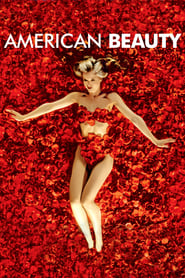

Title: Star Wars: Episode IV - A New Hope (1977) (Rating: 4.45, Count: 2991)


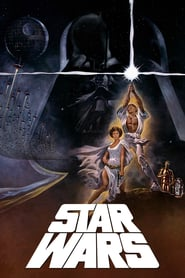

Title: Star Wars: Episode V - The Empire Strikes Back (1980) (Rating: 4.29, Count: 2990)


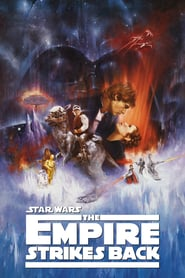

Title: Star Wars: Episode VI - Return of the Jedi (1983) (Rating: 4.02, Count: 2883)


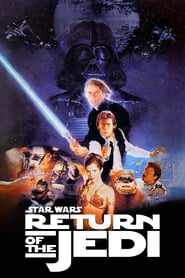

Title: Jurassic Park (1993) (Rating: 3.76, Count: 2672)


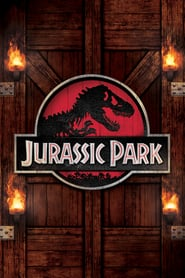

Title: Saving Private Ryan (1998) (Rating: 4.34, Count: 2653)


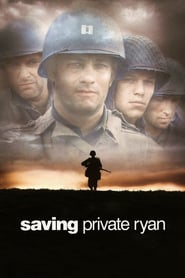

Title: Terminator 2: Judgment Day (1991) (Rating: 4.06, Count: 2649)


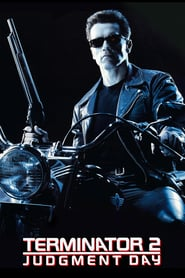

Title: Matrix, The (1999) (Rating: 4.32, Count: 2590)


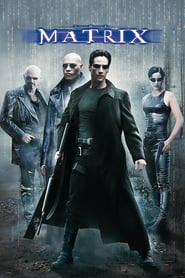

Title: Back to the Future (1985) (Rating: 3.99, Count: 2583)


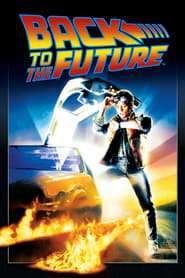

Title: Silence of the Lambs, The (1991) (Rating: 4.35, Count: 2578)


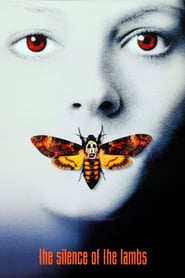

In [33]:
import pandas as pd
import numpy as np

movies_cols = ['MovieID', 'Title', 'Genres']
movies = pd.read_csv('ml-1m/movies.dat', sep='::', names=movies_cols, encoding='latin-1', engine='python')

rating_matrix = pd.read_csv('Rmat.csv')

rating_matrix.head(), rating_matrix.info()

rating_stats = {
    "num_users": rating_matrix.shape[0],
    "num_movies": rating_matrix.shape[1],
    "num_ratings": rating_matrix.count().sum(),
    "rating_density": rating_matrix.count().sum() / (rating_matrix.shape[0] * rating_matrix.shape[1])
}


ratings_filled = rating_matrix.fillna(0)

movie_rating_counts = ratings_filled.astype(bool).sum(axis=0)

movie_avg_ratings = rating_matrix.mean(axis=0, skipna=True)

popularity_df = pd.DataFrame({
    "MovieID": rating_matrix.columns,
    "RatingCount": movie_rating_counts,
    "AverageRating": movie_avg_ratings
}).sort_values(by=["RatingCount", "AverageRating"], ascending=[False, False])


popularity_df['MovieID'] = popularity_df['MovieID'].str.lstrip('m')
popularity_df['MovieID'] = popularity_df['MovieID'].astype(str)
movies['MovieID'] = movies['MovieID'].astype(str)
top_10_popular_movies = popularity_df.head(10)



top_10_popular_movies = popularity_df.head(10)
top_10_with_titles = pd.merge(top_10_popular_movies, movies, on='MovieID', how='left')

for _, row in top_10_with_titles.iterrows():
    print(f"Title: {row['Title']} (Rating: {row['AverageRating']:.2f}, Count: {row['RatingCount']})")
    display(Image(filename=f"./MovieImages/{row['MovieID']}.jpg"))
